In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace
import mesa
from mesa.datacollection import DataCollector
import numpy as np
from statistics import mean 
import pandas as pd
import collections

def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]


In [36]:


class MyAgent(Agent):
    
    def __init__(self, name, model,pos, state=None,dest=None, choi= None,leng=None,immun=None):
        super().__init__(name, model)
        self.name = name
        self.pos= pos
        self.state=state
        self.neigh=None
        self.neigh_names=None
        self.neigh_state=None
        self.heading=None
        self.dest=dest
        self.choices = choi
        self.posl1=None
        self.statel1=None
        self.days=None
        self.immunity=immun
        self.length=leng

    def neigh_namer(self, neigh):
        me = self.name
        them = (n.name for n in neigh)
        Names = []
        for other in them:
            Names.append(other)
        return Names
    def days_checker (self):
        now= self.state
        then=self.statel1
        days=sum(flatten([then,now]))
        return days
    def length_checker (self):
        days= self.state
        run=self.length
        length=sum(flatten([run,days]))
        return length
    def neigh_stater(self, neigh):
        sts = (n.state for n in neigh)
        States = []
        for st in sts:
            States.append(st)
        return States
    def state_adjuster(self, neigh):
        mine = self.state
        their = (n.state for n in neigh)
        interactions = []
        if len (neigh)>0:
            for other_st in their:
                if other_st > mine:
                    interactions.append(other_st)
                else:
                    interactions.append(mine)
        else:
            interactions=[mine,mine]
        return round(mean(flatten(interactions)))
    def length_adjuster(self):
        lengy= self.length
        aa=0
        if lengy>10:
            aa=0
        else:
            aa=lengy
        return aa
    def state_length_adjuster(self):
        lengy= self.length
        sty= self.state
        bb=0
        if lengy>10:
            bb=0
        else:
            bb=sty
        return bb
    def immunity_checker(self):
        lengy= self.length
        immu= self.immunity
        cc=0
        if lengy>10:
            cc=1
        else:
            cc=immu
        return cc
    def state_immunity_adjuster(self):
        immuny= self.immunity
        stay= self.state
        bb=stay
        if immuny==1:
            bb=0
        else:
            bb=stay
        return bb  
    def dest_adjuster(self):
        m1 = self.heading
        if m1==(0,0):
            kk=np.array([[100,100],[55,55],[100,10],[10,10]])
            jj=kk[np.random.choice(len(kk),1)]
            m2=np.array((jj[0][0],jj[0][1]))
        else:
            m2=self.dest
        return m2
    def step(self):
        
        neigh = self.model.space.get_neighbors(self.pos, 3, False)
        self.neigh=neigh
        self.statel1=self.state
        self.state=self.state_adjuster(neigh)
        self.days=self.days_checker()
        self.length=self.length_checker()
        self.neigh_names=self.neigh_namer(neigh)
        self.neigh_state=self.neigh_stater(neigh)
        self.heading=self.model.space.get_heading(self.pos, self.dest)
        self.posl1=self.pos
        self.dest=self.dest_adjuster()
        self.immunity=self.immunity_checker()
        self.length=self.length_adjuster()
        self.state=self.state_length_adjuster() 
        self.state=self.state_immunity_adjuster()
        new_step =[round(x/y) for x, y in zip([ x for x in self.heading], [ abs(x)+0.000001 for x in self.heading])]
        new_pos = (self.pos[0]+new_step[0],self.pos[1]+new_step[1])
        print("{} activated".format(self.name))
        self.model.space.move_agent(self, new_pos)

class MyModel(Model):
    
    def __init__(self, n_agents,xylim=110, prob=0.20,):
        super().__init__()
        self.schedule = RandomActivation(self)
        self.space = ContinuousSpace(xylim, xylim, torus=False)
        for i in range(n_agents):
            pos = (self.random.randrange(0, 100), self.random.randrange(0, 100))
            state=np.random.binomial(1, prob, 1)
            choices=np.array([[100,100],[55,55],[100,10],[10,10]])
            choi=choices[np.random.choice(len(choices),1)]
            dest=np.array((choi[0][0],choi[0][1]))
            leng=0
            immun=0
            a = MyAgent(i, self,pos,state, dest,choi,leng,immun)
            self.schedule.add(a)
            self.space.place_agent(a, pos)
            self.state=state
            self.dest=dest
            self.choices=choi
            self.length=leng
            self.immunity=immun
            self.dc = DataCollector(model_reporters={"agent_count":
                                    lambda m: m.schedule.get_agent_count()},
                                #agent_reporters={"neigh": lambda a: [a.neigh, a.name] }
                                agent_reporters={"neigh": lambda a: a.neigh_names,
                                                "name": lambda a: a.name,
                                                "state": lambda a: a.state,
                                                "statel1": lambda a: a.statel1,
                                                "days": lambda a: a.days,
                                                "length": lambda a: a.length,
                                                 "immunity": lambda a: a.immunity,
                                                "pos": lambda a: a.pos,
                                                "posl1": lambda a: a.posl1,
                                                "heading": lambda a: a.heading,
                                                "neigh_state": lambda a: a.neigh_state,
                                                "choice": lambda a: a.choices}
                                   )

    def step(self):
        self.schedule.step()
        self.dc.collect(self)

In [37]:
nagent=30
nstep=200

In [38]:
model = MyModel(nagent)
for t in range(nstep):
    model.step()
model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()


model_df

28 activated
21 activated
7 activated
9 activated
12 activated
16 activated
2 activated
20 activated
4 activated
14 activated
0 activated
23 activated
18 activated
8 activated
17 activated
27 activated
6 activated
13 activated
24 activated
5 activated
3 activated
29 activated
1 activated
11 activated
19 activated
22 activated
25 activated
26 activated
10 activated
15 activated
23 activated
24 activated
4 activated
8 activated
5 activated
14 activated
2 activated
13 activated
20 activated
17 activated
11 activated
27 activated
25 activated
7 activated
26 activated
0 activated
22 activated
18 activated
6 activated
12 activated
1 activated
16 activated
10 activated
3 activated
15 activated
21 activated
9 activated
19 activated
29 activated
28 activated
6 activated
25 activated
9 activated
8 activated
16 activated
4 activated
26 activated
22 activated
15 activated
1 activated
10 activated
3 activated
27 activated
11 activated
7 activated
29 activated
20 activated
2 activated
17 activated
2

15 activated
19 activated
4 activated
13 activated
12 activated
24 activated
17 activated
11 activated
28 activated
29 activated
26 activated
24 activated
20 activated
0 activated
8 activated
5 activated
27 activated
4 activated
22 activated
15 activated
21 activated
1 activated
19 activated
16 activated
13 activated
10 activated
25 activated
12 activated
9 activated
23 activated
2 activated
18 activated
3 activated
7 activated
14 activated
6 activated
13 activated
27 activated
2 activated
25 activated
8 activated
21 activated
17 activated
6 activated
10 activated
26 activated
20 activated
0 activated
3 activated
19 activated
5 activated
18 activated
7 activated
23 activated
29 activated
9 activated
11 activated
22 activated
16 activated
12 activated
14 activated
1 activated
24 activated
4 activated
28 activated
15 activated
15 activated
29 activated
28 activated
11 activated
23 activated
19 activated
5 activated
6 activated
3 activated
21 activated
10 activated
8 activated
12 activate

3 activated
26 activated
2 activated
0 activated
18 activated
12 activated
13 activated
21 activated
23 activated
5 activated
27 activated
9 activated
8 activated
28 activated
14 activated
25 activated
24 activated
20 activated
29 activated
10 activated
4 activated
11 activated
8 activated
24 activated
0 activated
12 activated
29 activated
22 activated
14 activated
19 activated
21 activated
3 activated
27 activated
7 activated
10 activated
18 activated
28 activated
13 activated
25 activated
15 activated
20 activated
6 activated
17 activated
16 activated
1 activated
4 activated
23 activated
2 activated
9 activated
5 activated
26 activated
24 activated
29 activated
3 activated
17 activated
6 activated
8 activated
18 activated
16 activated
22 activated
12 activated
4 activated
20 activated
7 activated
9 activated
13 activated
21 activated
2 activated
23 activated
27 activated
5 activated
28 activated
10 activated
11 activated
14 activated
1 activated
19 activated
0 activated
15 activated


1 activated
16 activated
14 activated
8 activated
18 activated
21 activated
2 activated
20 activated
26 activated
25 activated
0 activated
3 activated
16 activated
1 activated
9 activated
12 activated
4 activated
11 activated
5 activated
23 activated
15 activated
28 activated
24 activated
27 activated
29 activated
13 activated
6 activated
10 activated
19 activated
22 activated
7 activated
17 activated
14 activated
27 activated
26 activated
1 activated
4 activated
28 activated
29 activated
0 activated
19 activated
21 activated
2 activated
12 activated
22 activated
6 activated
10 activated
9 activated
13 activated
17 activated
11 activated
23 activated
25 activated
24 activated
16 activated
5 activated
8 activated
7 activated
18 activated
20 activated
3 activated
15 activated
19 activated
10 activated
13 activated
9 activated
20 activated
25 activated
24 activated
8 activated
23 activated
5 activated
26 activated
2 activated
6 activated
29 activated
1 activated
27 activated
4 activated
2

19 activated
20 activated
28 activated
12 activated
10 activated
2 activated
14 activated
21 activated
13 activated
25 activated
23 activated
5 activated
0 activated
25 activated
2 activated
0 activated
8 activated
18 activated
13 activated
1 activated
17 activated
6 activated
22 activated
29 activated
12 activated
27 activated
23 activated
19 activated
26 activated
5 activated
10 activated
28 activated
7 activated
14 activated
11 activated
24 activated
16 activated
20 activated
21 activated
15 activated
4 activated
3 activated
9 activated
18 activated
10 activated
16 activated
22 activated
26 activated
3 activated
21 activated
12 activated
2 activated
27 activated
5 activated
28 activated
14 activated
23 activated
9 activated
19 activated
29 activated
8 activated
11 activated
4 activated
15 activated
25 activated
7 activated
20 activated
1 activated
24 activated
0 activated
6 activated
17 activated
13 activated
7 activated
3 activated
25 activated
12 activated
17 activated
22 activate

agent_count
0    30         
1    30         
2    30         
3    30         
4    30         
5    30         
6    30         
7    30         
8    30         
9    30         
10   30         
11   30         
12   30         
13   30         
14   30         
15   30         
16   30         
17   30         
18   30         
19   30         
20   30         
21   30         
22   30         
23   30         
24   30         
25   30         
26   30         
27   30         
28   30         
29   30         
30   30         
31   30         
32   30         
33   30         
34   30         
35   30         
36   30         
37   30         
38   30         
39   30         
40   30         
41   30         
42   30         
43   30         
44   30         
45   30         
46   30         
47   30         
48   30         
49   30         
50   30         
51   30         
52   30         
53   30         
54   30         
55   30         
56   30         
57   30         
58   30         
59   30         
60   30         
61   30         
62   30         
63   30         
64   30         
65   30         
66   30         
67   30         
68   30         
69   30         
70   30         
71   30         
72   30         
73   30         
74   30         
75   30         
76   30         
77   30         
78   30         
79   30         
80   30         
81   30         
82   30         
83   30         
84   30         
85   30         
86   30         
87   30         
88   30         
89   30         
90   30         
91   30         
92   30         
93   30         
94   30         
95   30         
96   30         
97   30         
98   30         
99   30         
100  30         
101  30         
102  30         
103  30         
104  30         
105  30         
106  30         
107  30         
108  30         
109  30         
110  30         
111  30         
112  30         
113  30         
114  30         
115  30         
116  30         
117  30         
118  30         
119  30         
120  30         
121  30         
122  30         
123  30         
124  30         
125  30         
126  30         
127  30         
128  30         
129  30         
130  30         
131  30         
132  30         
133  30         
134  30         
135  30         
136  30         
137  30         
138  30         
139  30         
140  30         
141  30         
142  30         
143  30         
144  30         
145  30         
146  30         
147  30         
148  30         
149  30         
150  30         
151  30         
152  30         
153  30         
154  30         
155  30         
156  30         
157  30         
158  30         
159  30         
160  30         
161  30         
162  30         
163  30         
164  30         
165  30         
166  30         
167  30         
168  30         
169  30         
170  30         
171  30         
172  30         
173  30         
174  30         
175  30         
176  30         
177  30         
178  30         
179  30         
180  30         
181  30         
182  30         
183  30         
184  30         
185  30         
186  30         
187  30         
188  30         
189  30         
190  30         
191  30         
192  30         
193  30         
194  30         
195  30         
196  30         
197  30         
198  30         
199  30

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [40]:
agent_df

neigh  name  state statel1  days  length  \
Step AgentID                                                            
1    0        []                    0     0      [0]     0     0        
     1        []                    1     0      [0]     0     0        
     2        []                    2     0      [0]     0     0        
     3        []                    3     0      [0]     0     0        
     4        []                    4     0      [0]     0     0        
     5        []                    5     0      [0]     0     0        
     6        []                    6     0      [0]     0     0        
     7        [0]                   7     1      [1]     2     1        
     8        []                    8     0      [0]     0     0        
     9        [15]                  9     0      [0]     0     0        
     10       []                    10    0      [0]     0     0        
     11       []                    11    1      [1]     2     1        
     12       []                    12    0      [0]     0     0        
     13       [29]                  13    1      [0]     1     1        
     14       []                    14    0      [0]     0     0        
     15       [9]                   15    0      [0]     0     0        
     16       []                    16    0      [0]     0     0        
     17       []                    17    1      [1]     2     1        
     18       []                    18    1      [1]     2     1        
     19       []                    19    1      [1]     2     1        
     20       []                    20    0      [0]     0     0        
     21       []                    21    0      [0]     0     0        
     22       []                    22    0      [0]     0     0        
     23       []                    23    0      [0]     0     0        
     24       []                    24    1      [1]     2     1        
     25       []                    25    0      [0]     0     0        
     26       []                    26    0      [0]     0     0        
     27       []                    27    1      [1]     2     1        
     28       []                    28    1      [1]     2     1        
     29       []                    29    1      [1]     2     1        
2    0        []                    0     0      0       0     0        
     1        []                    1     0      0       0     0        
     2        []                    2     0      0       0     0        
     3        []                    3     0      0       0     0        
     4        []                    4     0      0       0     0        
     5        []                    5     0      0       0     0        
     6        []                    6     0      0       0     0        
     7        [5]                   7     1      1       2     2        
     8        []                    8     0      0       0     0        
     9        [15]                  9     0      0       0     0        
     10       []                    10    0      0       0     0        
     11       []                    11    1      1       2     2        
     12       []                    12    0      0       0     0        
     13       [29]                  13    1      1       2     2        
     14       []                    14    0      0       0     0        
     15       [9]                   15    0      0       0     0        
     16       []                    16    0      0       0     0        
     17       []                    17    1      1       2     2        
     18       []                    18    1      1       2     2        
     19       []                    19    1      1       2     2        
     20       []                    20    0      0       0     0        
     21       [24]                  21    1      0       1     1        
     22       []                    22    0      0       0     0        
     23       

In [69]:
def populate (df, vec):
    for v in vec:
        kk=np.array(v).tolist()
        x=int(max(0, kk[0]-1))
        y=int(max(0, kk[1]-1))
        df [x,y]=1
    return df

In [70]:
dat=np.zeros((100,100))
dats=[]
for i in range(nstep):
    a=[j for j in range(0+(i*nagent),(nagent+(i*nagent)))]
    vec=agent_df["posl1"].values[a]
    dat=np.zeros((100,100))
    dats.append(populate (dat,vec))
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


<IPython.core.display.Javascript object>


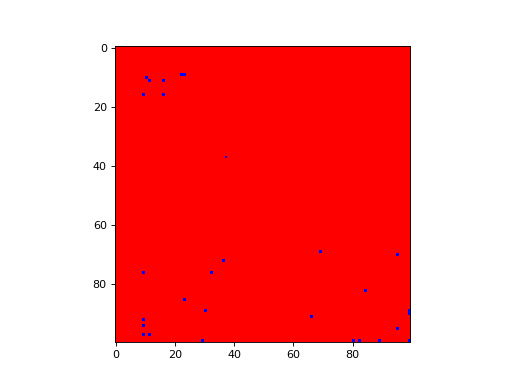

In [71]:
from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,.05,1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(nstep):
    data = dats[i] 
    ax.imshow(data, cmap=cmap, norm=norm)
    camera.snap()
animation = camera.animate()

In [49]:
def populate2(df, vec,vec2):
    for i in range(len(vec2)):
        if vec2[i]==0:
            kk=np.array(vec[i]).tolist()
            x=int(max(0, kk[0]-1))
            y=int(max(0, kk[1]-1))
            df [x,y]=1
        else:
            kk=np.array(vec[i]).tolist()
            x=int(max(0, kk[0]-1))
            y=int(max(0, kk[1]-1))
            df [x,y]=10
    return df

In [65]:
dat=np.zeros((100,100))
dats=[]
for i in range(nstep):
    a=[j for j in range(0+(i*nagent),(nagent+(i*nagent)))]
    vec=agent_df["posl1"].values[a]
    vec2=agent_df["state"].values[a]
    dat=np.zeros((100,100))
    dats.append(populate2 (dat,vec,vec2))
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


<IPython.core.display.Javascript object>


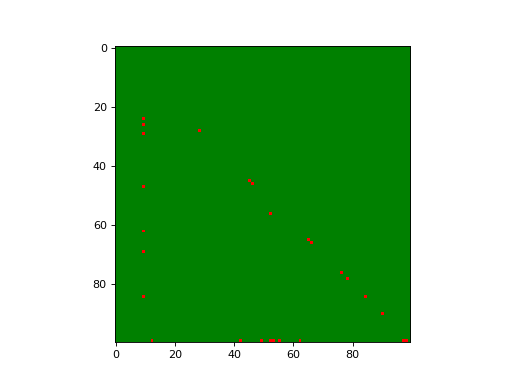

In [68]:

from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import colors
cmap = colors.ListedColormap(['green', 'blue', "red"])
bounds = [0,0.5,1,10]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(nstep):
    data = dats[i] 
    ax.imshow(data, cmap=cmap, norm=norm)
    camera.snap()
animation = camera.animate()